In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
"""
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
"""

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


"\nfrom nltk.corpus import stopwords\nstopwords = set(stopwords.words('english'))\n"

In [2]:
cleancsv='vout.csv'
inputcsv='v3.csv'
keyword=["34"]

In [3]:

from IPython.display import clear_output
remove=['|','Arnab','Goswami','LIVE','Debate','video','picture','WATCH','NOW','WATCH:','LIVE:','Read','UPDATE','Guess','Biggest',' conte&#39','Big','data','here&#39;s','dataset','datasets','content','context','acknowledgement','inspiration','watch','hashtag','using','view','twitter','com','tweet','share','live','take','qout','debate','let','pick']
def Sentimentalize(tokens):
  

  sid = SentimentIntensityAnalyzer()
  ss = sid.polarity_scores(tokens)
  
  pos=ss['pos']
  neg=ss['neg']
  
  if pos>neg:
    return pos
  elif neg>pos:
    return -1*neg
  else:
    return 0  
    
    
    
def removeRedundantWords(tweet):
  cleaned=""
  
   
  tokens_tag = nltk.pos_tag(tweet.split())
  for word in tokens_tag:
    if "NN" in word or "NNS" in word or "NNPS" in word or "NNP" in word:
      if word[0] not in remove:

        cleaned+=word[0]+ " "
        
          
  return cleaned   

file1  = open(inputcsv, "rt")
file1reader = csv.reader(file1)
i=1

CleanList=[['date','comment','retweet','like','engagement score','sentimental score','tweet']]
for row in file1reader:
  line=[]
  i+=1
  if row[11]=='Republic':
    
    #clean tweet here
    removeHash=row[13].replace('&#39','')
    removeHash=removeHash.replace('"','')
    removeHash=removeHash.replace('\'','')
    removeHash=removeHash.replace('I\'m','')
    hyperlinkRemovedText = re.sub(r"http\S+", "", removeHash)
    hyperlinkRemovedText = re.sub(r"pic.\S+", "", hyperlinkRemovedText)
    
    tokens=hyperlinkRemovedText.split()
    
    sentimentalScore=Sentimentalize(hyperlinkRemovedText)
   
    date=row[6][0:10]
    line.append(date)
    
    tweet=removeRedundantWords(hyperlinkRemovedText)
    #add scores and sentimental scores
    line.append(int(row[14]))
    line.append(int(row[15]))
    line.append(int(row[16]))
    comment=int(row[14])
    retweet=int(row[15])
    like=int(row[16])
    score=comment*2+retweet*3+like
    line.append(score)
    line.append(sentimentalScore)
    
    line.append(tweet.lower())
  
  
  if line:
    CleanList.append(line)
    
  if i%2170==0:
    clear_output()
    print(str(i/2170) + "%")
    
    
    


with open(cleancsv, "w") as f:
  
  writer = csv.writer(f)
  writer.writerows(CleanList)

  

FileNotFoundError: ignored

adding test genres to v2.2.3.csv

#ADD KEYWORD

In [4]:
import csv
import matplotlib.pyplot as plt


file2  = open(cleancsv, "rt")
file2reader = csv.reader(file2)
searchword=keyword

searchdict={}

for rows in file2reader:
  
  if rows[0] in searchdict :
    values=int(searchdict[rows[0]])
    for wr in searchword:
      if wr in rows[6]:
        values+=int(rows[4])
        searchdict[rows[0]]=values
  else:
    searchdict[rows[0]]=0
    
print(searchdict)


plt.bar(range(len(searchdict)), list(searchdict.values()), align='center')
plt.xticks(range(len(searchdict)), list(searchdict.keys()))
plt.show()

FileNotFoundError: ignored

#ONLY ONCE

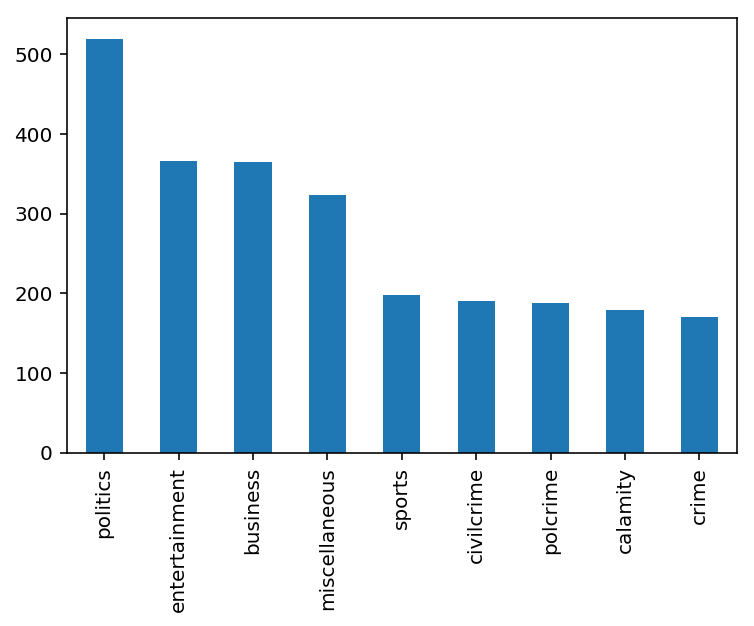

0.893141153081511
0.7654075546719682
               precision    recall  f1-score   support

            0       0.00      0.00      0.00         2
     business       0.84      0.95      0.89        75
     calamity       0.81      0.94      0.87        36
   civilcrime       0.79      0.92      0.85        53
        crime       0.46      0.38      0.42        29
entertainment       0.85      0.83      0.84        84
miscellaneous       0.55      0.57      0.56        58
     polcrime       0.90      0.54      0.68        35
     politics       0.76      0.75      0.75       100
       sports       0.82      0.74      0.78        31

     accuracy                           0.77       503
    macro avg       0.68      0.66      0.66       503
 weighted avg       0.76      0.77      0.76       503



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Input keyword has highest presence in  politics  tweets


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

np.random.seed(123456)

dataset =  pd.read_csv('c3.test.csv')
dataset.head()

dataset['genre'].unique()
dataset['genre'].value_counts().plot(kind="bar")
plt.show()

import re
import string



dataset['TEXT'] = [str(s) for s in dataset['tweet']]
import sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


vectorizer = CountVectorizer()
x = vectorizer.fit_transform(dataset['TEXT'])

encoder = LabelEncoder()
y = encoder.fit_transform(dataset['genre'].fillna('0'))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
"""
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
"""
#%%time 

nb = MultinomialNB()
nb.fit(x_train, y_train)
#%%time

results_nb_cv = cross_val_score(nb, x_train, y_train, cv=10)
#print(results_nb_cv.mean())
print(nb.score(x_train, y_train))

x_test_pred = nb.predict(x_test)
print(sklearn.metrics.accuracy_score(y_test, x_test_pred))

#print(confusion_matrix(y_test, x_test_pred))

print(classification_report(y_test, x_test_pred, target_names=encoder.classes_))

def predict_cat(title):
    cat_names = {'crime' : 'crime', 'miscellaneous' : 'miscellaneous', 'entertainment' : 'entertainment', 'sports' : 'sports', 'polcrime':'polcrime','politics' : 'politics','business':'business','civilcrime':'civilcrime','politicalcivil':'politicalcivil','polcriminal':'polcrime','calamity':'calamity'}
    cod = nb.predict(vectorizer.transform([title]))
    return cat_names[encoder.inverse_transform(cod)[0]]
  


addgenre  = open(cleancsv, "rt")
addg = csv.reader(addgenre)
addglist=[['date','comment','retweet','like','engagement score','sentiment score','tweet','genre']]
for rowg in addg:
  addgll=[]
  addgll.append(rowg[0])
  addgll.append(rowg[1])
  addgll.append(rowg[2])
  addgll.append(rowg[3])
  addgll.append(rowg[4])
  addgll.append(rowg[5])
  addgll.append(rowg[6])
  vahl=predict_cat(rowg[6])
  addgll.append(vahl)
  addglist.append(addgll)
  

with open(cleancsv, "w") as fred:
  
  writer = csv.writer(fred)
  writer.writerows(addglist)
  
  
gen={} 
file12  = open(cleancsv, "rt")
gendet = csv.reader(file12)

for rowrow in gendet:
  for s in searchword:
    if s in rowrow[6]:
      if rowrow[7] in gen:
        gen[rowrow[7]]+=1
      else:
        gen[rowrow[7]]=1
          

import operator

print("Input keyword has highest presence in ", max(gen, key=gen.get)," tweets")



#GENRE OF KEYWORD


In [ ]:
gen={} 
file12  = open(cleancsv, "rt")
gendet = csv.reader(file12)

for rowrow in gendet:
  for s in searchword:
    if s in rowrow[6]:
      if rowrow[7] in gen:
        gen[rowrow[7]]+=1
      else:
        gen[rowrow[7]]=1
          


import operator

gengen=max(gen, key=gen.get, default='miscellaneous')
print(gengen)

miscellaneous


#OUTPUT

In [ ]:
fullopent={}
import numpy as np
from scipy import stats
from statistics import mean

def function(dictinput):
  
  
  if(len(dictinput)>1):
    
    print(dictinput)
    
    out=dictinput
    xs = np.array(list(range(1,len(out)+1)), dtype=np.float64)
    ys = np.array(list(out.values()), dtype=np.float64)
    #slope, intercept, r_value, p_value, std_err = stats.linregress(xs,ys)
    
    
    def best_fit_slope(xs,ys):
        m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
             ((mean(xs)*mean(xs)) - mean(xs*xs)))
        return m

    m = best_fit_slope(xs,ys)
    print(m)
    compare=m
   
    plt.bar(range(len(out)), list(out.values()), align='center')
    plt.xticks(range(len(out)), list(out.keys()))
    plt.show()
    
    
    
    filechecker  = open(cleancsv, "rt")
    filerreader = csv.reader(filechecker)
    
    restOfTheEntities = {}
    opent={}
    entlist=[]
    slope={}
    for liner in filerreader:
      
      if liner[0] in dictinput:
        
        for wr in searchword:
          if wr not in liner[6]:



            if liner[7] in restOfTheEntities:


              if liner[0] in restOfTheEntities[liner[7]]:
                restOfTheEntities[liner[7]][liner[0]]+=int(liner[4])

              else:
                restOfTheEntities[liner[7]][liner[0]]=int(liner[4])
                
              

            else:
              if len(liner[7] )>0:
                restOfTheEntities[liner[7]]={}
                
                
            for wrwr in liner[6].split():
              if wrwr in opent:
                opent[wrwr]+=1
              else:
                opent[wrwr]=1
              
              
              
    print(restOfTheEntities)
    print(opent)
    fullopent[len(fullopent)]=opent
    
    for vals in restOfTheEntities:
      
      if len(restOfTheEntities[vals])>1:
        
        
        
        xs1 = np.array(list(range(1,len(restOfTheEntities[vals])+1)), dtype=np.float64)
        ys1 = np.array(list(restOfTheEntities[vals].values()), dtype=np.float64)

        def best_fit_slope1(xs1,ys1):
            m1 = (((mean(xs1)*mean(ys1)) - mean(xs1*ys1)) /
                 ((mean(xs1)*mean(xs1)) - mean(xs1*xs1)))
            return m1

        m1 = best_fit_slope(xs1,ys1)
        
        if m1>0 and m1>m:
          print(vals,m1)
          if vals in finalvals:
            finalvals[vals]+=1
          else:
            finalvals[vals]=1
          
      
    print(slope)
    
    print("\n\n\n\n\n\n\n")
    ans.append(1)
    

  
    
    
dict={}
finalvals={}
ans=[]
for val in searchdict:
  if searchdict[val]==0  :
    function(dict)
    dict={}
    continue
    
  else:
    
    
    dict[val]=searchdict[val]
    
    
    


#len(dict)!=0   

Report on  ['sania'] 

['sania'] has  4  news story references in the testing year. 
Genre-> entertainment 
Number of upward sloped genres-> 9 

politics -> 3 / 4
business -> 2 / 4
civilcrime -> 3 / 4
polcrime -> 2 / 4
sports -> 1 / 4
crime -> 3 / 4
miscellaneous -> 2 / 4
calamity -> 1 / 4
entertainment -> 1 / 4


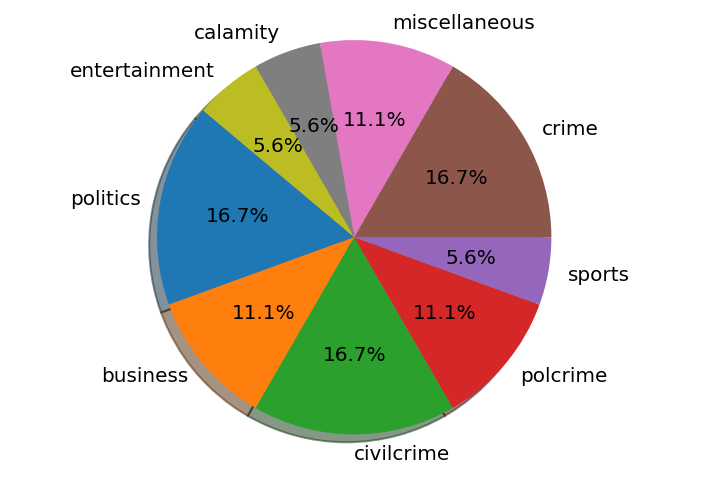


 {0: {'col': 1, 'saurabh': 1, 'singh': 2, 'shekhawat': 1, 'story': 2, 'time': 20, 'aam': 1, 'aadmi': 1, 'party': 3, 'song': 2, 'years': 10, 'power': 1, 'delhi;': 1, 'government;s': 1, 'achievements': 1, 'india': 6, 'history;': 1, 'odi': 1, 'runs': 1, 'series': 3, 'victory': 2, 'south': 1, 'africa.': 1, '#indvsa': 4, 'alliance': 3, 'bjp': 22, 'ipft': 2, 'separation': 1, 'tripura;;': 1, 'manik': 1, 'sarkar.': 1, 'statement;': 1, 'inc.': 1, 'areas': 1, 'roles.': 1, 'flight': 2, 'recorders': 1, 'plane;s': 1, 'airspeed': 1, 'sensors;': 1, 'result': 1, 'failure': 1, 'heating': 1, 'nehlen': 2, 'image': 2, 'prince': 2, 'harry': 2, 'markle;': 2, 'face': 7, 'cheddar': 2, 'man.': 2, 'israel': 2, 'pm': 8, '#benjaminnetanyahu;s': 1, 'corruption': 1, 'charges': 1, 'calls': 1, 'years;': 2, '#daca': 1, 'puzzle;;': 1, 'virat': 3, 'kohli': 3, 'team': 4, 'win.': 2, '#timeforrevenge': 1, '#dharmendrapradhan': 1, '#pakistan;': 1, 'desh;.': 1, 'watch!': 1, 'adventurist': 2, 'pune;': 2, 'shital': 2, 'rane':

In [ ]:
totalnew=len(ans) 

print("Report on ",searchword,"\n")
print(searchword, "has ",totalnew," news story references in the testing year. \nGenre->",gengen,"\nNumber of upward sloped genres->",len(finalvals),"\n")
for i in finalvals:
  print(i,"->",finalvals[i],"/",totalnew)

  
import matplotlib.pyplot as plt

labels = []
sizes=[]
for i in finalvals:
  labels.append(i)
  sizes.append(finalvals[i])



# Plot
plt.pie(sizes, labels=labels, 
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


print("\n",fullopent)
  


In [ ]:
#searchdict - date and value
#searchword - keys
#finalvals  - genres

In [ ]:
opopen  = open('c3.app.csv', "rt")
opread = csv.reader(opopen)

for opgenre in finalvals:
  
  for oprow in opread: